In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import featurewiz as fw
np.random.seed(1234)
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest


In [381]:
data = pd.read_csv("C:\\Users\omerl\OneDrive\Documents\GitHub\Data_challenge_IML\data_frame.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
# print the count of missing values in each column
for col in data.columns:
    print(col, data[col].isnull().sum())
# data.drop(['hotel_brand_code','hotel_chain_code', 'hotel_city_code'], axis=1, inplace=True)
# drop all the rows with missing values

print(data.info())
print(data.columns)
print(data.shape)


booking_datetime 0
checkin_date 0
hotel_star_rating 0
charge_option 0
guest_is_not_the_customer 0
no_of_adults 0
no_of_children 0
request_extra_bed 0
no_of_room 0
original_selling_amount 0
original_payment_type 0
is_user_logged_in 0
is_first_booking 0
number_of_requests 0
cancellation_datetime 0
hotel_brand_code 43308
hotel_chain_code 42855
hotel_city_code 0
is_cancelled 0
cancel_policy_0D0N 0
cancel_policy_14D100P 0
cancel_policy_14D100P_100P 0
cancel_policy_14D1N_100P 0
cancel_policy_1D0N_100P 0
cancel_policy_1D100P 0
cancel_policy_1D100P_100P 0
cancel_policy_1D1N_100P 0
cancel_policy_1D1N_1N 0
cancel_policy_1D20P_100P 0
cancel_policy_1D50P_100P 0
cancel_policy_2D100P 0
cancel_policy_2D100P_100P 0
cancel_policy_2D1N_100P 0
cancel_policy_2D1N_1N 0
cancel_policy_365D100P_100P 0
cancel_policy_3D100P 0
cancel_policy_3D100P_100P 0
cancel_policy_3D1N_100P 0
cancel_policy_3D1N_1D100P_100P 0
cancel_policy_3D1N_1N 0
cancel_policy_3D50P_100P 0
cancel_policy_4D100P 0
cancel_policy_4D100P_100P 0

In [382]:
# create a list of tupels whth the coulumn and the count of missing values
missing_values = [(col, data[col].isnull().sum()) for col in data.columns]
# sort the list by the number of missing values
missing_values = sorted(missing_values, key=lambda x: x[1], reverse=True)
# print the missing value count
print(missing_values)

[('hotel_brand_code', 43308), ('hotel_chain_code', 42855), ('booking_datetime', 0), ('checkin_date', 0), ('hotel_star_rating', 0), ('charge_option', 0), ('guest_is_not_the_customer', 0), ('no_of_adults', 0), ('no_of_children', 0), ('request_extra_bed', 0), ('no_of_room', 0), ('original_selling_amount', 0), ('original_payment_type', 0), ('is_user_logged_in', 0), ('is_first_booking', 0), ('number_of_requests', 0), ('cancellation_datetime', 0), ('hotel_city_code', 0), ('is_cancelled', 0), ('cancel_policy_0D0N', 0), ('cancel_policy_14D100P', 0), ('cancel_policy_14D100P_100P', 0), ('cancel_policy_14D1N_100P', 0), ('cancel_policy_1D0N_100P', 0), ('cancel_policy_1D100P', 0), ('cancel_policy_1D100P_100P', 0), ('cancel_policy_1D1N_100P', 0), ('cancel_policy_1D1N_1N', 0), ('cancel_policy_1D20P_100P', 0), ('cancel_policy_1D50P_100P', 0), ('cancel_policy_2D100P', 0), ('cancel_policy_2D100P_100P', 0), ('cancel_policy_2D1N_100P', 0), ('cancel_policy_2D1N_1N', 0), ('cancel_policy_365D100P_100P', 0), 

In [383]:
# cleaning the data remove missing values and duplicates
data['cancellation_datetime'] = data['cancellation_datetime'].fillna('2022-02-01')
data['cancellation_datetime'] = pd.to_datetime(data['cancellation_datetime'])
filtered_df = data.loc[(data['cancellation_datetime'] <= '2018-09-29') | (data['cancellation_datetime'] == '2022-02-01')]
filtered_df['booking_datetime'] = filtered_df['booking_datetime'].apply(pd.to_datetime)
filtered_df['is_cancelled'] = (filtered_df['cancellation_datetime'] - filtered_df['booking_datetime']).dt.days
filtered_df['is_cancelled'] = filtered_df['is_cancelled'].apply(lambda x: 1 if x<=44 and x >=35 else 0)
filtered_df.drop(['cancellation_datetime', 'booking_datetime', 'checkin_date'], axis=1, inplace=True)
data = filtered_df

In [384]:
dummy_brand_code = pd.get_dummies(data['hotel_brand_code'], prefix="hotel_brand")
dummy_chain_code = pd.get_dummies(data['hotel_chain_code'], prefix="hotel_chain")
dummy_city = pd.get_dummies(data['hotel_city_code'], prefix="hotel_city")
dummy_data = pd.concat([dummy_brand_code, dummy_chain_code, dummy_city], axis=1)
for col in dummy_data.columns:
    if dummy_data[col].sum() < 50:
        dummy_data.drop(col, axis=1, inplace=True)
data = pd.concat([data, dummy_data], axis=1)
# drop the columns that are not needed
data.drop(['hotel_brand_code','hotel_chain_code', 'hotel_city_code'], axis=1, inplace=True)
# drop rows with missing values
data.dropna(inplace=True)

In [385]:
print(data.shape)
print(data.info())
# drop all the duplicates column
data = data.loc[:,~data.columns.duplicated()]

(58588, 439)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58588 entries, 0 to 58587
Columns: 439 entries, hotel_star_rating to hotel_city_2799
dtypes: bool(2), float64(2), int64(120), uint8(315)
memory usage: 72.7 MB
None


In [415]:
y = data['is_cancelled']
X = data.drop(['is_cancelled'], axis=1)
X_scale = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(data['is_cancelled'].value_counts())

(52729, 438) (5859, 438) (52729,) (5859,)
0    58113
1      475
Name: is_cancelled, dtype: int64


In [387]:
# SVM classifier

In [388]:
# from sklearn.svm import SVC
# model_SVC = SVC(kernel = 'rbf', random_state = 4)
# model_SVC.fit(X_train, y_train)
#
# y_pred_svm = model_SVC.predict_proba(X_test)

In [389]:
# Logistic Classifier

In [416]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.predict_proba(X_test)

In [391]:
#k nearest neighbors

In [417]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict_proba(X_test)

In [395]:
# feature selection with sklearn random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=200, criterion='entropy'), threshold='median')
sel.fit(X_train, y_train)
X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)
print(type(sel))
print(X_train_new.shape)
print(X_test_new.shape)


<class 'sklearn.feature_selection._from_model.SelectFromModel'>
(52729, 219)
(5859, 219)


In [425]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=190,criterion='entropy')
forest.fit(X_train_new, y_train)
y_pred_forest = forest.predict_proba(X_test_new)
print(X_test_new.shape)

(5859, 219)


In [426]:
#Plot ROC and compare AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score
print("Training Accuracy is: ", forest.score(X_train_new, y_train))
print("Testing Accuracy is: ", forest.score(X_test_new, y_test))
y_pred_forest = y_pred_forest[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)
print("AUC Score is: ", roc_auc_score(y_test, y_pred_forest))

Training Accuracy is:  0.999962070208045
Testing Accuracy is:  0.9924901860385731
AUC Score is:  0.8573806520658946


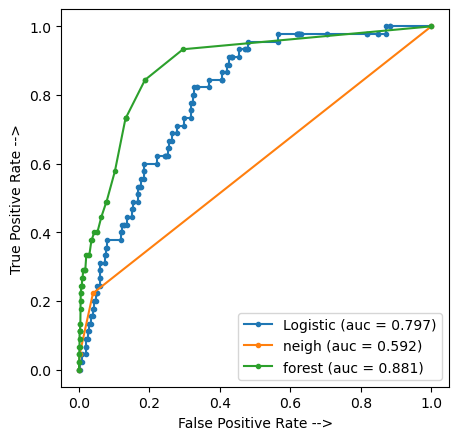

In [398]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_logistic = y_pred_logistic[:,1]
y_pred_neigh = y_pred_neigh[:,1]
y_pred_forest= y_pred_forest

logistic_fpr, logistic_tpr, threshold_test = roc_curve(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_logistic)

neigh_fpr, neigh_tpr, neigh_threshold = roc_curve(y_test, y_pred_neigh)
auc_neigh = roc_auc_score(y_test, y_pred_neigh)

forest_fpr, forest_tpr, forest_threshold = roc_curve(y_test, y_pred_forest)
auc_forest = roc_auc_score(y_test, y_pred_forest)

plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(neigh_fpr, neigh_tpr, marker='.', label='neigh (auc = %0.3f)' % auc_neigh)
plt.plot(forest_fpr, forest_tpr, marker='.', label='forest (auc = %0.3f)' % auc_forest)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [399]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52729, 438) (5859, 438) (52729,) (5859,)


In [410]:
print(data.shape)

(58588, 439)


In [411]:
print(data.columns)

Index(['hotel_star_rating', 'charge_option', 'guest_is_not_the_customer',
       'no_of_adults', 'no_of_children', 'request_extra_bed', 'no_of_room',
       'original_selling_amount', 'original_payment_type', 'is_user_logged_in',
       ...
       'hotel_city_2649', 'hotel_city_2667', 'hotel_city_2728',
       'hotel_city_2733', 'hotel_city_2737', 'hotel_city_2782',
       'hotel_city_2783', 'hotel_city_2796', 'hotel_city_2797',
       'hotel_city_2799'],
      dtype='object', length=439)


In [412]:
print(data['is_cancelled'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: is_cancelled, dtype: int64


In [435]:
# write data to csv
data.to_csv('train_data.csv', index=False)


In [429]:
print("finish")

finish
